#### Discrete Simulation HW7
#### Problem 1
Authored: Austin Jetrin Maddison 6481268

In [164]:
import matplotlib.pyplot as plt
import numpy as np
from duckdb.duckdb import dtype

from my_settings import *

a.)

In [165]:
def walk(n=12):
    spots = np.zeros(n, dtype=bool)
    enough_sets_exist = lambda x: np.count_nonzero(x) == n

    positions = [0]
    while not enough_sets_exist(spots):
        positions += [(positions[-1] + (2 * (np.random.randint(0, 2)) - 1)) % n ]
        spots[positions[-1]] = True

    return positions

In [172]:
# a
res = walk(12)
print("Walk Positions", res)
print("Second Last Spot", res[-2])

Walk Positions [0, 11, 0, 1, 0, 1, 2, 1, 2, 3, 2, 3, 4, 5, 6, 5, 4, 5, 4, 5, 6, 5, 4, 3, 2, 1, 2, 1, 2, 1, 2, 1, 0, 1, 0, 11, 10, 9, 10, 11, 10, 9, 8, 9, 8, 7]
Second Last Spot 8


In [167]:
f = np.vectorize(lambda x: walk(12)[-2])
N=100_000
res_2nd_to_last = f(np.zeros(N, dtype=int))

[0.01535 0.06105 0.06116 0.10444 0.10394 0.10653 0.10609 0.10421 0.10821
 0.10736 0.06076 0.0609 ] [ 0  1  2  3  4  5  6  7  8  9 10 11 12]


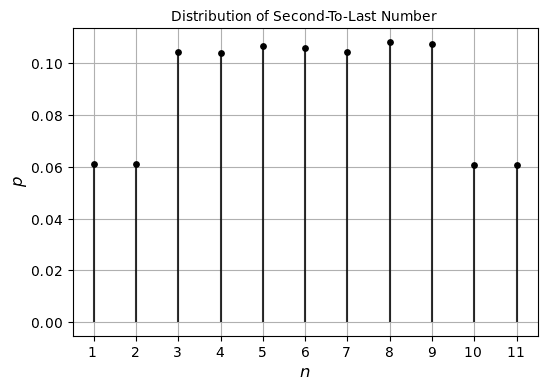

In [168]:
hist, edge = np.histogram(res_2nd_to_last, bins=np.arange(0, 12+1, 1, dtype=int), density=True)
print(hist, edge)

plt.figure(figsize=(6, 4))
plt.scatter(edge[1:-1], hist[1:], s=15, color="k", marker='o', zorder=4)
plt.vlines(edge[1:-1], ymax=hist[1:], ymin=np.zeros(hist.size-1), color='k', alpha=0.8)


plt.xticks(np.arange(1, 12, 1, dtype=int))
# plt.yticks(np.arange(0, 1.1, 0.05, dtype=float))
# plt.xlim(0.5, 9.5)
# plt.ylim(0, 0.25)
plt.grid()
plt.title("Distribution of Second-To-Last Number", fontsize=10)
plt.xlabel("$n$", fontsize=12)
plt.ylabel("$p$", fontsize=12)
plt.savefig("../drawings/p1.pdf")

b.)

In [169]:
f = np.vectorize(lambda x: walk(12)[-1])
N=100_000
res_1st_to_last = f(np.zeros(N, dtype=int))

[0.09081 0.04632 0.09233 0.09038 0.09209 0.08985 0.08954 0.09122 0.09085
 0.09011 0.09145 0.04505] [ 0  1  2  3  4  5  6  7  8  9 10 11 12]


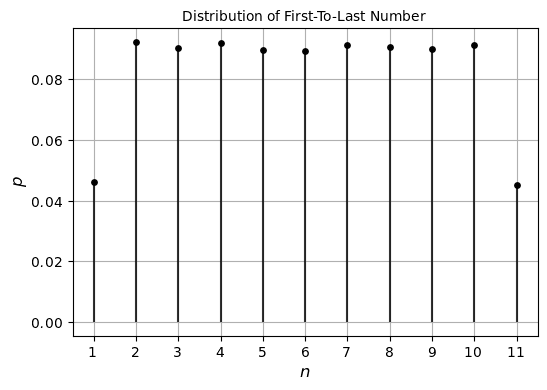

In [170]:
hist, edge = np.histogram(res_1st_to_last, bins=np.arange(0, 12+1, 1, dtype=int), density=True)
print(hist, edge)

plt.figure(figsize=(6, 4))
plt.scatter(edge[1:-1], hist[1:], s=15, color="k", marker='o', zorder=4)
plt.vlines(edge[1:-1], ymax=hist[1:], ymin=np.zeros(hist.size-1), color='k', alpha=0.8)


plt.xticks(np.arange(1, 12, 1, dtype=int))
plt.grid()
plt.title("Distribution of First-To-Last Number", fontsize=10)
plt.xlabel("$n$", fontsize=12)
plt.ylabel("$p$", fontsize=12)
plt.savefig("../drawings/p1.pdf")

b) As we know from class, all positions excluding the starting position is equally as likely to be k. This works because the walk is circular meaning visiting all points is possible from both directions. Now the modified program where k is the second-to-last shows more concentration on the center. This makes sense as we are not counting the ends, thus more weight is given to the other positions hence the higher concentration.